In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from decpomdp import DecPOMDP
import Classes
import time
import os



In [2]:
file_name = "dectiger"
planning_horizon = 4
num_iterations = 4
sota_ = False
games = ["cooperative","zerosum","stackelberg"]


In [3]:
#import problem
problem = DecPOMDP(file_name, 1,horizon=planning_horizon)
# constant = Constants(problem)
# utilities = Utilities(constant)
Classes.set_problem(problem)

# print(f"game of initiated with SOTA set to = {sota_} with horizon {planning_horizon}")
print(f"game size :\n\t|S| = {len(problem.states)}")
print(f"\t|Z| = {problem.num_joint_observations}\n\t|U| = {problem.num_joint_actions} with |U_i| = {problem.num_actions[0]}")
print(f"intiial_belief : {problem.b0}")


print(f"{problem.num_actions[0]},{problem.num_actions[0]}")

problem set to dectiger
game size :
	|S| = 2
	|Z| = 4
	|U| = 9 with |U_i| = 3
intiial_belief : [0.5 0.5]
3,3


In [4]:
def add_to_database(database,horizon,game_type,num_iterations,average_time,num_beliefs,V0_B0,V1_B0,SOTA,density,gap):
    sota = {True:"State of the Art" , False:"Stackelberg"}
    database["gametype"].append(game_type)
    database["horizon"].append(horizon)
    database["SOTA"].append(sota[SOTA])
    database["num_iterations"].append(num_iterations)
    database["average_time"].append(average_time)
    database["number_of_beliefs"].append(num_beliefs)
    database["leader_value"].append(V0_B0)
    database["follower_value"].append(V1_B0)
    database["gap"].append(abs(V0_B0-V1_B0))
    database["density"].append(density)
    return

In [5]:
# solve
def SOLVE(game,database,horizon,gametype):
    start_time = time.time()
    policy , belief_size , densities = game.solve(num_iterations,0.6)
    end_time = time.time()
    solve_time = end_time - start_time
    for iterations in range(num_iterations):
        value0,value1= policy[0][iterations].value , policy[1][iterations].value
        add_to_database(database,horizon,gametype,iterations,solve_time,belief_size[iterations],value0,value1,sota_,densities[iterations],np.abs(value1-value0))
    return policy

def plots(database):
    Strong_leader = database[database["SOTA"]=="Stackelberg"][database["horizon"]==planning_horizon]
    Weak_leader = database[database["SOTA"]!="Stackelberg"][database["horizon"]==planning_horizon]

    fig, axs = plt.subplots(len(games), figsize=(8, 6))

    for idx,gametype in enumerate(games):
        strong_leader_data = Strong_leader[Strong_leader["gametype"]==gametype]["leader_value"]
        weak_leader_data = Weak_leader[Weak_leader["gametype"]==gametype]["leader_value"]
        print(strong_leader_data)
        print(weak_leader_data)
        
        axs[idx].plot(range(len(strong_leader_data)),strong_leader_data, label='Strong Leader Strong Follower')
        axs[idx].plot(range(len(weak_leader_data)),weak_leader_data, label='Weak Leader Weak Leader')
        axs[idx].set_title(f'{gametype} game'.format(idx+1))
        axs[idx].set_ylabel('Leader Value')
        axs[idx].set_xlabel('Iterations')
        axs[idx].legend()
    # plt.title("Results of PBVI algorithm for {file_name}")
    file_path = f'plots/result_{file_name}_{planning_horizon}_{num_iterations}.png'
    fig.savefig(file_path)
    plt.tight_layout()
    plt.show()
    return


In [6]:
def initialize_storage():
    database = {"gametype":[],
                "SOTA" : [],
                "horizon": [],
                    "num_iterations" : [],
                    "average_time" : [],
                    "number_of_beliefs" : [],
                    "leader_value":[],
                    "follower_value":[],
                    "density" : [],
                    "gap":[]
                   
                    }
    policies = {"cooperative" : {True:None,False:None} ,"zerosum":{True:None,False:None},"stackelberg":{True:None,False:None}}
    policy_comparison_matrix = {"cooperative" : [] ,"zerosum":[],"stackelberg":[]}
    return database,policies,policy_comparison_matrix

def export_policy_matrix(policy_comparison_matrix,gametype):
    matrix = pd.DataFrame(policy_comparison_matrix[gametype],columns=["Strong Follower","Weak Follower"],index=["Strong Leader","Weak Leader"])
    path = "comparison_matrix/"
    filename = f"{file_name}_{gametype}_{planning_horizon}_{num_iterations}.csv"
    matrix.to_csv(path+filename)
    

problem set to dectiger

============= cooperative GAME WITH HORIZON 1 , SOTA False ===========
	belief expansion done
iteration : 1


	backup at timestep 1 done
	backup at timestep 0 done
	backward induction done
	belief expansion done
iteration : 2
	backup at timestep 1 done
	backup at timestep 0 done
	backward induction done
	belief expansion done
iteration : 3
	backup at timestep 1 done
	backup at timestep 0 done
	backward induction done
	belief expansion done
iteration : 4
	backup at timestep 1 done
	backup at timestep 0 done
	backward induction done

============= cooperative GAME WITH HORIZON 1 , SOTA True ===========
	belief expansion done
iteration : 1
	backup at timestep 1 done
	backup at timestep 0 done
	backward induction done
	belief expansion done
iteration : 2
	backup at timestep 1 done
	backup at timestep 0 done
	backward induction done
	belief expansion done
iteration : 3
	backup at timestep 1 done
	backup at timestep 0 done
	backward induction done
	belief expansion done
iteration : 4
	backup at timestep 1 done
	backup at timestep 0 done
	backward induction done

============= cooperative GAME WITH H

/var/folders/sz/1rmm95756pqfc118zm4kfbt40000gn/T/ipykernel_46333/1467860695.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Strong_leader = database[database["SOTA"]=="Stackelberg"][database["horizon"]==planning_horizon]
/var/folders/sz/1rmm95756pqfc118zm4kfbt40000gn/T/ipykernel_46333/1467860695.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Weak_leader = database[database["SOTA"]!="Stackelberg"][database["horizon"]==planning_horizon]


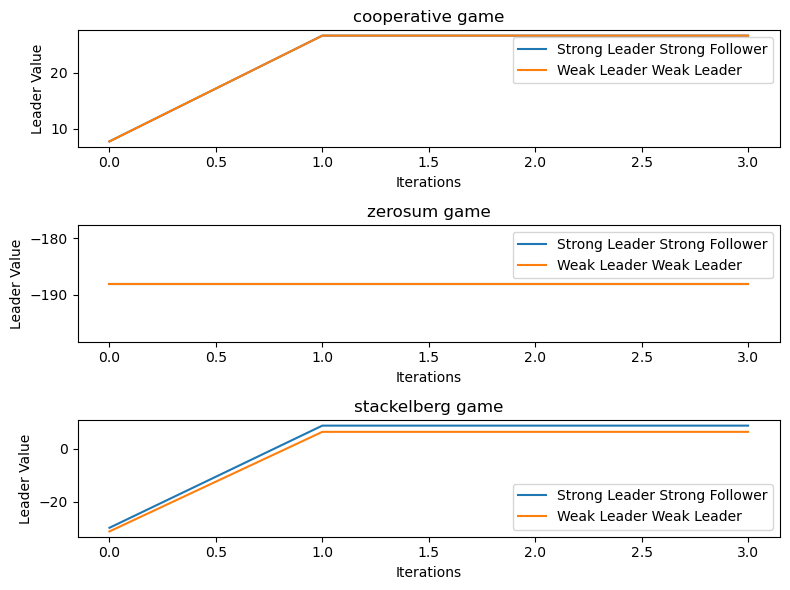

In [7]:
database,policies,policy_comparison_matrix = initialize_storage()
problem = DecPOMDP(file_name,1,horizon=planning_horizon)
Classes.set_problem(problem)

for gametype in ["cooperative","zerosum","stackelberg"]:
    for horizon in range(1,planning_horizon+1):
        for sota_ in [False,True]:
            print(f"\n============= {gametype} GAME WITH HORIZON {horizon} , SOTA {sota_} ===========")
            game = Classes.PBVI(problem=problem,horizon=horizon,density=0.9,gametype=gametype,sota=sota_)
            policies[gametype][sota_] = SOLVE(game,database,horizon,gametype)
    game.build_comparison_matrix(policy_comparison_matrix,policies,gametype,iteration=num_iterations-1)
    export_policy_matrix(policy_comparison_matrix,gametype)
database = pd.DataFrame(database)
path = "Results/"
file_name = f"{file_name}_{horizon}_experiment_results.csv"
database.to_csv(path+file_name, index=False)
plots(database)



In [8]:
len(policies[gametype][True])
policies[gametype][True][0]

In [12]:
database[database["gametype"]=="zerosum"]

,gametype,SOTA,horizon,num_iterations,average_time,number_of_beliefs,leader_value,follower_value,density,gap
32,zerosum,Stackelberg,1,0,0.351361,3,-88.222750,88.222750,0.9000,176.445500
33,zerosum,Stackelberg,1,1,0.351361,4,-88.222750,88.222750,0.5400,176.445500
34,zerosum,Stackelberg,1,2,0.351361,4,-88.222750,88.222750,0.3240,176.445500
35,zerosum,Stackelberg,1,3,0.351361,4,-88.222750,88.222750,0.1944,176.445500
36,zerosum,State of the Art,1,0,0.438304,3,-88.222750,-88.222750,0.9000,0.000000
37,zerosum,State of the Art,1,1,0.438304,4,-88.222750,-88.222750,0.5400,0.000000
38,zerosum,State of the Art,1,2,0.438304,4,-88.222750,-88.222750,0.3240,0.000000
39,zerosum,State of the Art,1,3,0.438304,4,-88.222750,-88.222750,0.1944,0.000000
40,zerosum,Stackelberg,2,0,0.496699,5,-125.250593,125.250593,0.9000,250.501187
41,zerosum,Stackelberg,2,1,0.496699,7,-125.250593,125.250593,0.5400,250.501187


In [10]:
a = None
if type(a) ==NoneType:
    print("YAY")

NameError: name 'NoneType' is not defined